**Autism Prediction using Machine Learning**

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

# Ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

Let's proceed by loading the dataset into a pandas DataFrame and display the first five rows.

Credits to "iamSam5, Laxman Naik, Suryansu Dash, Tensor Girl, Vijayabharathi. (2022). ML Olympiad - Autism Prediction Challenge. Kaggle. https://kaggle.com/competitions/autism-prediction" for the dataset.

In [4]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv('DataSet/train.csv')

# Displaying the first five rows of the DataFrame
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         1         1  ...       f  White-European       no     no   
1         0         0  ...       f     South Asian       no     no   
2         0         1  ...       f  White-European       no     no   
3         0         0  ...       f     South Asian       no     no   
4         0         1  ...       m           Black       no    yes   

    contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   United States       

Let's examine the dimensions of the dataset.

In [5]:
# Determining the size of the dataset
dataset_size = df.shape
print("Dataset size:", dataset_size)

Dataset size: (800, 22)


Let's inspect each column in the dataset to identify the type of data it contains

In [6]:
# Displaying information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

Based on the information provided for each column above, it's evident that there are no null values present in the dataset.

In [7]:
# Displaying descriptive statistics for the DataFrame, transposed for better readability
print(df.describe().transpose())

           count        mean         std       min         25%         50%  \
ID         800.0  400.500000  231.084400  1.000000  200.750000  400.500000   
A1_Score   800.0    0.582500    0.493455  0.000000    0.000000    1.000000   
A2_Score   800.0    0.286250    0.452290  0.000000    0.000000    0.000000   
A3_Score   800.0    0.321250    0.467249  0.000000    0.000000    0.000000   
A4_Score   800.0    0.415000    0.493030  0.000000    0.000000    0.000000   
A5_Score   800.0    0.457500    0.498502  0.000000    0.000000    0.000000   
A6_Score   800.0    0.208750    0.406670  0.000000    0.000000    0.000000   
A7_Score   800.0    0.273750    0.446161  0.000000    0.000000    0.000000   
A8_Score   800.0    0.717500    0.450497  0.000000    0.000000    1.000000   
A9_Score   800.0    0.316250    0.465303  0.000000    0.000000    0.000000   
A10_Score  800.0    0.460000    0.498709  0.000000    0.000000    0.000000   
age        800.0   28.612306   12.872373  9.560505   19.282082  

**DATA CLEANING**

Data obtained directly from primary sources, referred to as raw data, often requires significant preprocessing before drawing conclusions or applying models. These preprocessing steps, collectively known as data cleaning, involve tasks such as removing outliers, imputing null values, and resolving discrepancies within the data inputs.

In [8]:
# Counting the occurrences of each unique value in the 'ethnicity' column
ethnicity_counts = df['ethnicity'].value_counts()
print(ethnicity_counts)

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64


From the preceding outputs, it's evident that there is some ambiguity present. The presence of '?', 'others', and 'Others' suggests that they likely represent the same category, possibly indicating unknown or substituted null values.

In [9]:
# Counting the occurrences of each unique value in the 'relation' column
relation_counts = df['relation'].value_counts()
print(relation_counts)

Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: relation, dtype: int64


Similarly, the situation applies to this column as well. Therefore, let's proceed to clean this data. Additionally, we will convert 'yes' and 'no' values to 0 and 1, respectively.

In [10]:
# Replacing values in the DataFrame
df = df.replace({'yes': 1, 'no': 0, '?': 'Others', 'others': 'Others'})

Now that we've performed some data cleaning, we're ready to delve into exploring the dataset.

**EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) involves utilizing visual techniques to analyze data. Its purpose is to uncover trends, patterns, or validate assumptions through statistical summaries and graphical representations. In this section, we will examine methods to assess data imbalance and skewness.

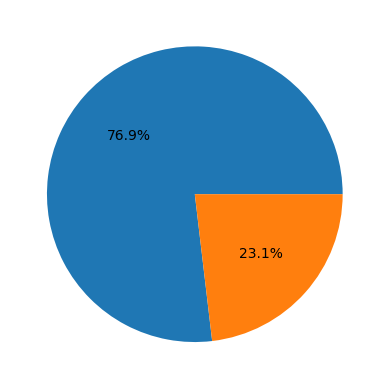

In [11]:
# Creating a pie chart to visualize the distribution of values in the 'Class/ASD' column
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

The dataset we're working with exhibits a significant imbalance. Training our model with this data poses challenges, particularly in accurately predicting the positive class, which is our primary goal. We aim to predict whether an individual has autism or not with a high degree of accuracy.

In [12]:
# Initializing empty lists to categorize column data types
ints = []
objects = []
floats = []

# Iterating through DataFrame columns to categorize them based on data types
for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

Now that we've sorted the columns based on the type of data they contain, we're well-equipped to conduct appropriate analyses tailored to each data type.

In [13]:
# Removing specific columns from the list of integer columns
ints.remove('ID')
ints.remove('Class/ASD')

The 'ID' column holds a unique value for each row, while we've already analyzed the distribution of the 'Class/ASD' column. Therefore, these columns have been excluded from the above code.

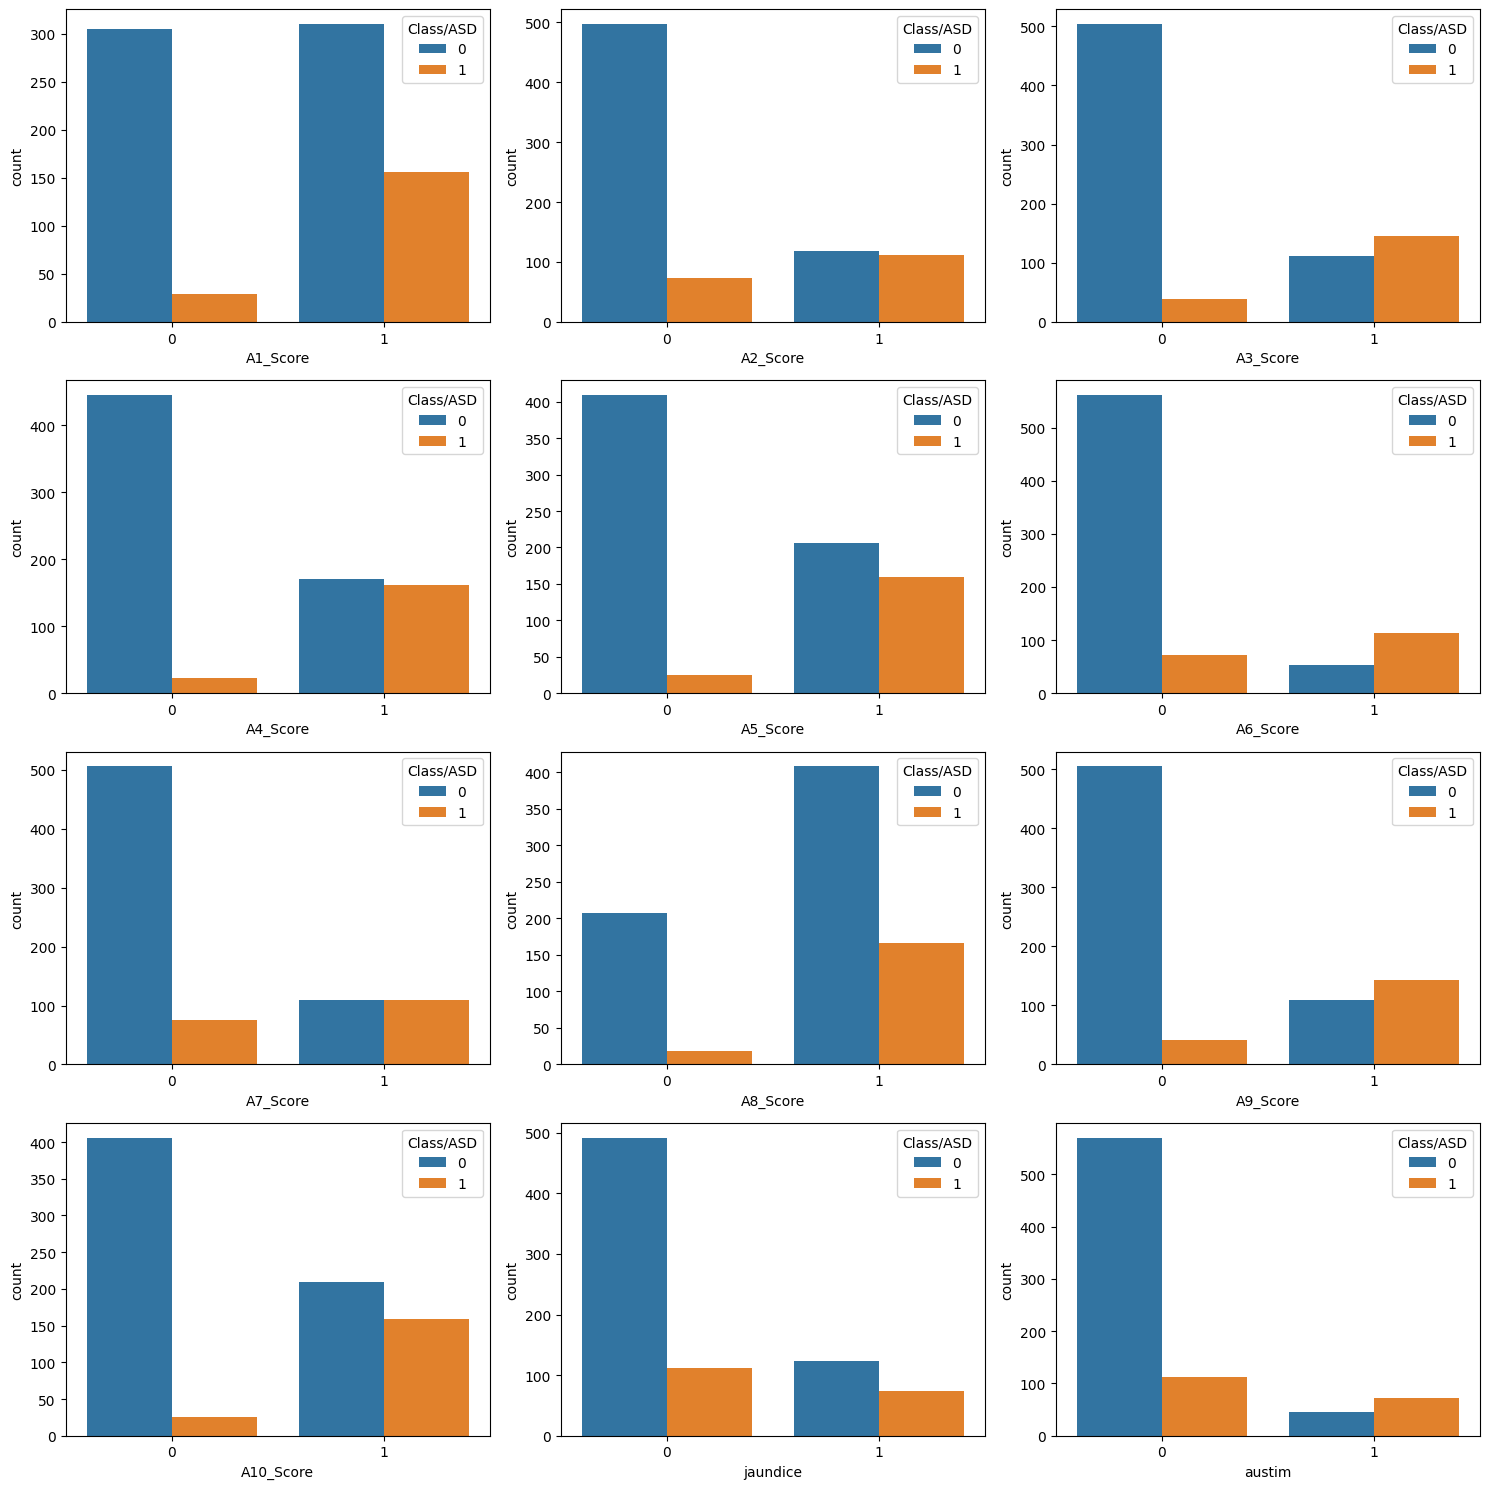

In [14]:
# Setting up the subplots with a specific figure size
plt.subplots(figsize=(15,15))

# Iterating through integer columns
for i, col in enumerate(ints):
    if i < 12:  # Ensuring we don't exceed the maximum number of subplots
        # Creating subplots
        plt.subplot(4, 3, i+1)
        # Plotting countplot with 'Class/ASD' as hue
        sns.countplot(data=df, x=col, hue='Class/ASD')
        plt.tight_layout()

# Displaying the plots
plt.show()

Based on these visualizations, it can be inferred that when the score of certain indicators is 0, the likelihood of the individual not having autism is notably elevated, except for the scenario of A8_Score.

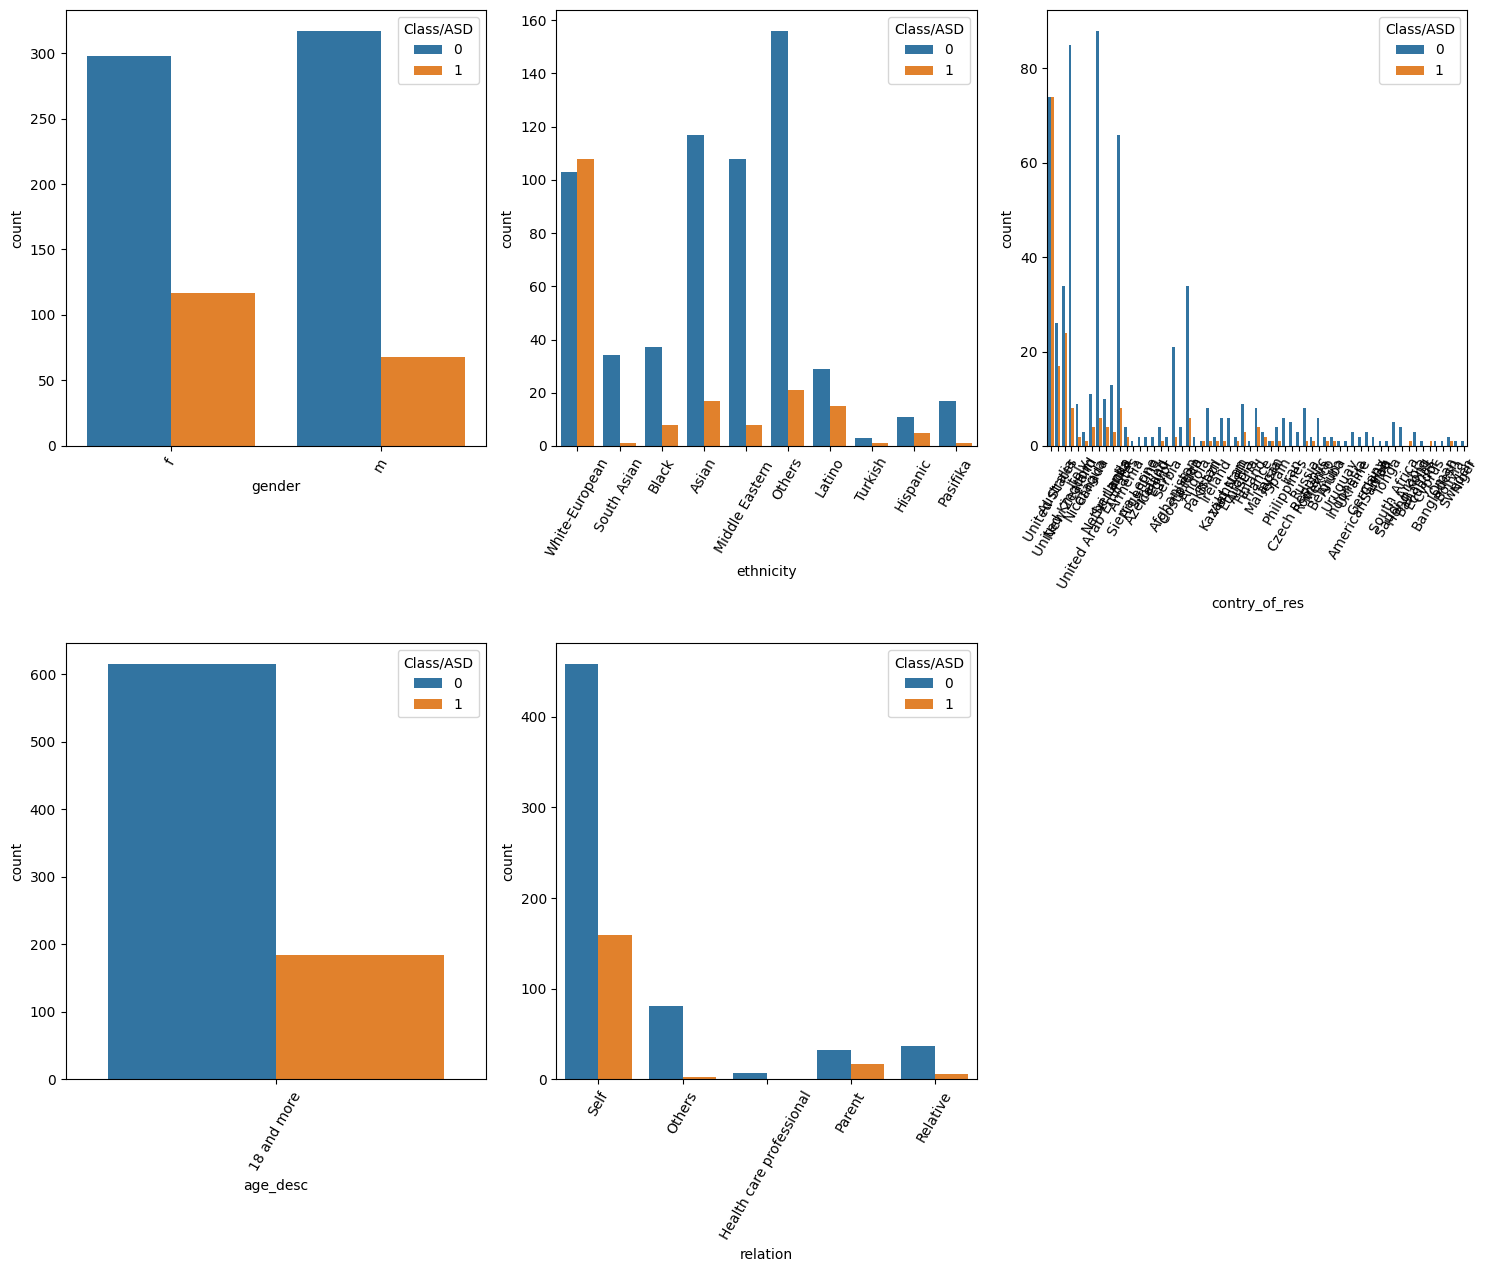

In [15]:
# Setting up the subplots with a specific figure size
plt.subplots(figsize=(15, 30))

# Iterating through object columns
for i, col in enumerate(objects):
    # Creating subplots
    plt.subplot(5, 3, i+1)
    # Plotting countplot with 'Class/ASD' as hue
    sns.countplot(data=df, x=col, hue='Class/ASD')
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=60)

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

Based on the visualizations above, we can make the following observations:

- All data points have the same 'Age_desc' value, indicating potential redundancy in this feature.
- The 'used_app_before' feature appears to be either uninformative or could lead to data leakage.
- The visualization suggests a higher likelihood of males having autism compared to females. However, this observation may be skewed due to an unequal distribution of examples between genders.

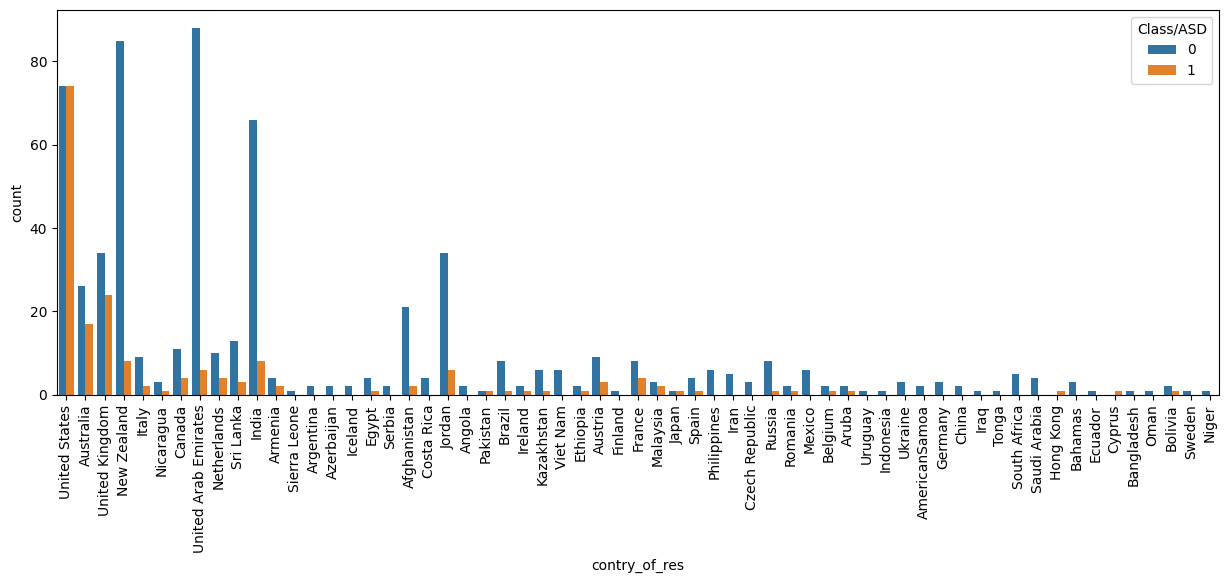

In [16]:
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting countplot for 'contry_of_res' with 'Class/ASD' as hue
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

In certain regions, around 50% of the available data indicates individuals with autism, while in other regions, this prevalence is considerably lower. This suggests that an individual's geographical location may provide insight into the likelihood of autism.

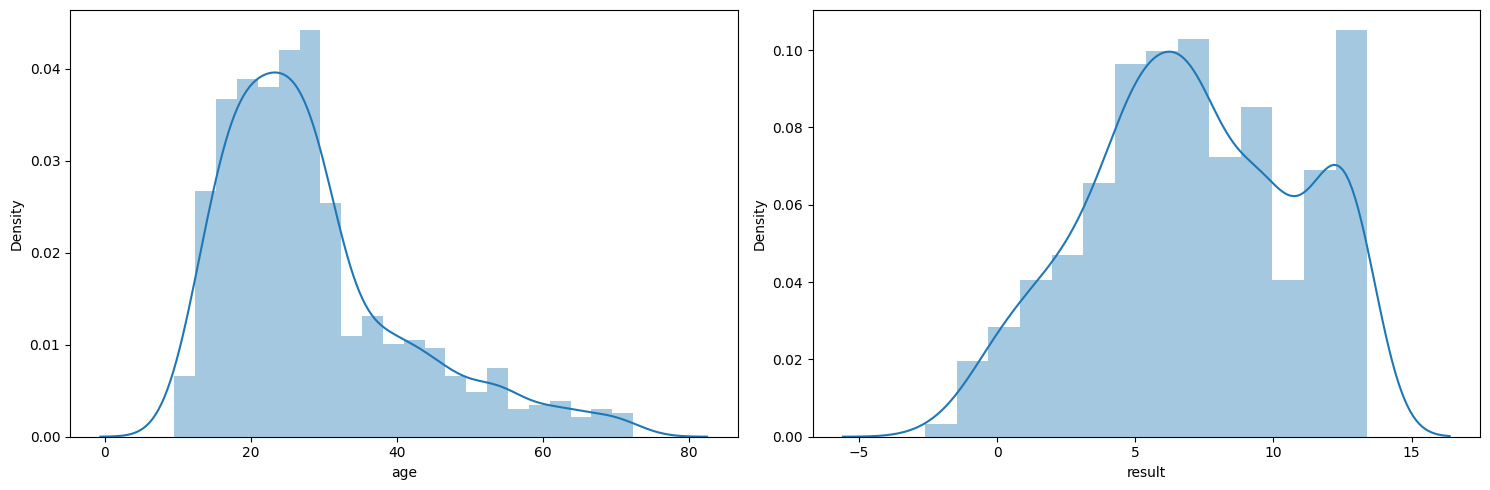

In [17]:
# Setting up the subplots with a specific figure size
plt.subplots(figsize=(15,5))

# Iterating through float columns
for i, col in enumerate(floats):
    # Creating subplots
    plt.subplot(1, 2, i+1)
    # Plotting distribution plot for the column
    sns.distplot(df[col])
    plt.tight_layout()

# Displaying the plots
plt.show()

Both continuous datasets exhibit left skewness, with one skewed positively and the other skewed negatively.

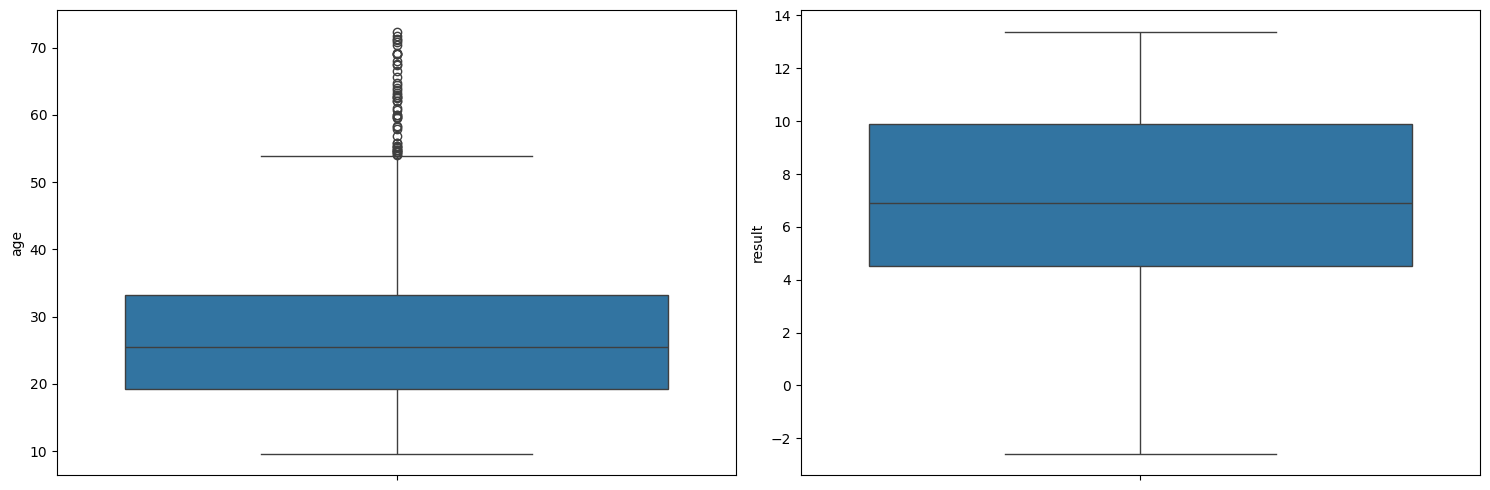

In [18]:
# Setting up the subplots with a specific figure size
plt.subplots(figsize=(15,5))

# Iterating through float columns
for i, col in enumerate(floats):
    # Creating subplots
    plt.subplot(1, 2, i+1)
    # Plotting boxplot for the column
    sns.boxplot(df[col])
    plt.tight_layout()

# Displaying the plots
plt.show()

**FEATURE ENGINEERING**

Feature engineering involves creating new features from existing ones, which can enhance the model's performance and provide deeper insights into the data.

In [19]:
  # This function creates age groups based on age ranges
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

# Applying the function to create 'ageGroup' column
df['ageGroup'] = df['age'].apply(convertAge)

Next, we'll examine the distribution of cases across different age groups.

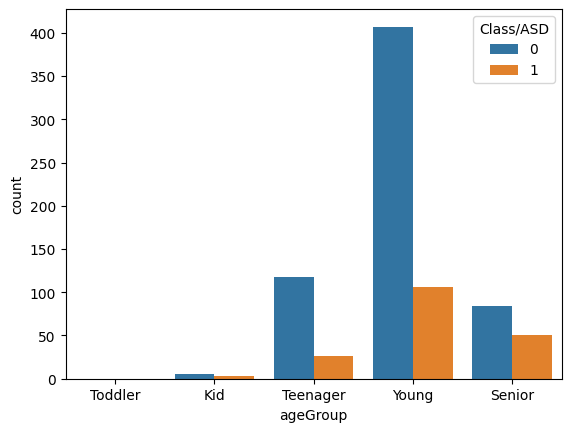

In [20]:
# Plotting a countplot to visualize the distribution of cases across age groups, with 'Class/ASD' as hue
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'], order=['Toddler', 'Kid', 'Teenager', 'Young', 'Senior'])
plt.show()

From this analysis, it appears that individuals in the Young and Toddler age groups exhibit lower likelihoods of autism.

In [21]:
def add_feature(data):
    # Create a column 'sum_score' initialized with zero values
    data['sum_score'] = 0

    # Iterate through columns from 'A1_Score' to 'A10_Score'
    for col in data.loc[:, 'A1_Score':'A10_Score'].columns:
        # Update 'sum_score' by adding scores from A1 to A10
        data['sum_score'] += data[col]

    # Create a new column 'ind' by summing three existing columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

    return data

# Call the add_feature function and assign the result back to df
df = add_feature(df)

In the code snippet above, we have aggregated the clinical scores provided from A1 to A10.

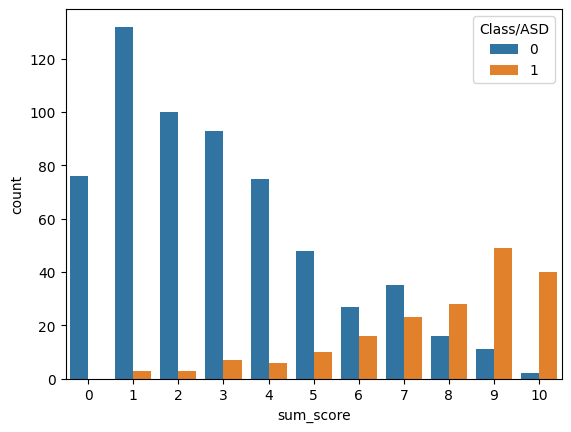

In [22]:
# Plotting a countplot to visualize the distribution of 'Class/ASD' across the 'sum_score' column
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

Another noteworthy observation is that individuals with higher sum scores tend to have a higher likelihood of autism, while those with lower sum scores, particularly those below 5, are less likely to have autism.

In [23]:
# Applying log transformations to mitigate data skewness in the 'age' column
df['age'] = df['age'].apply(lambda x: np.log(x))

The provided age data exhibits positive skewness. Since skewed data can affect model performance, we'll employ log transformations to mitigate the skewness in the data.

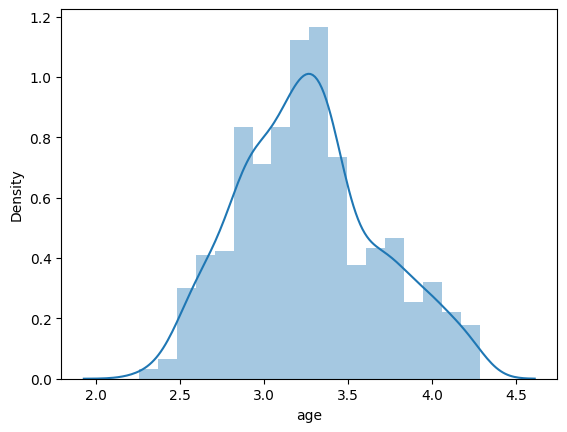

In [24]:
# Plotting a distribution plot for the 'age' column
sns.distplot(df['age'])
plt.show()

The log transformations have effectively mitigated the skewness in the data.

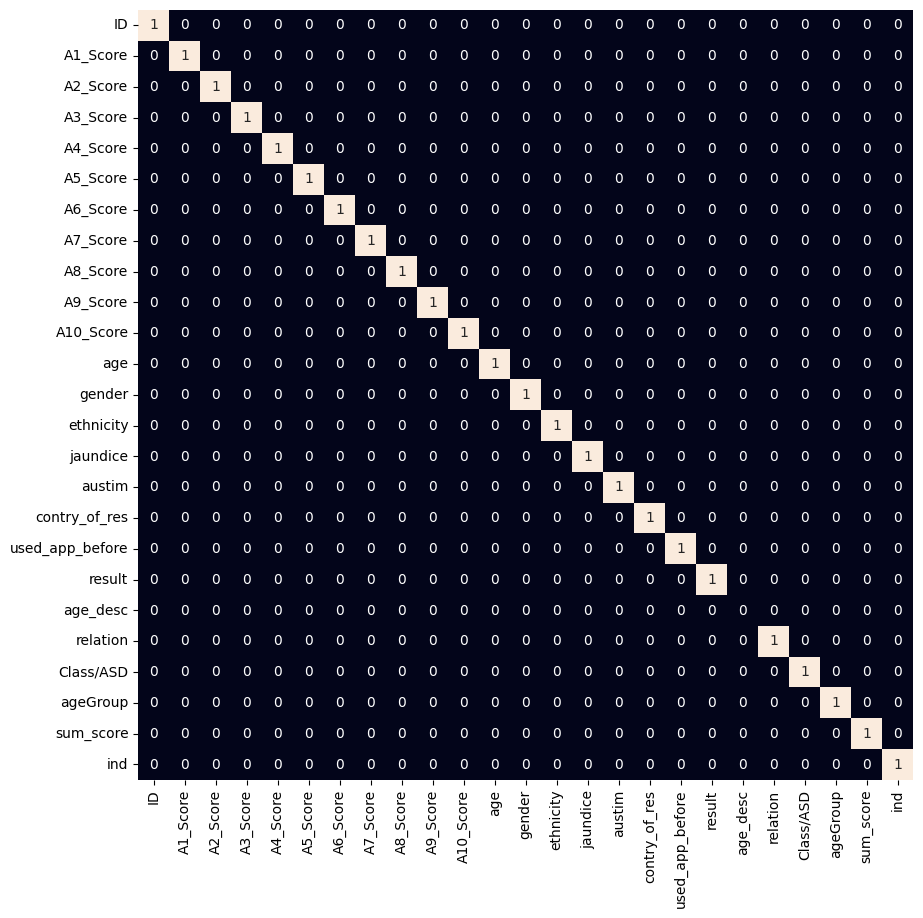

In [25]:
def encode_labels(data):
    for col in data.columns:
        # Check if the data type is 'object' and encode it if so
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

# Encoding labels in the DataFrame 'df'
df = encode_labels(df)

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

From the heatmap above, it's evident that there's only one pair of highly correlated features. We'll exclude these before training the model, as highly correlated features don't contribute to learning useful patterns in the data.

**MODEL TRAINING**:

Next, we'll segregate the features and target variables, then split them into training and testing datasets. We'll use these datasets to select the model that performs best on the validation data.

In [26]:
# List of columns to remove from features
removal = ['ID', 'age_desc', 'used_app_before', 'austim']

# Create features dataframe by dropping specified columns
features = df.drop(removal + ['Class/ASD'], axis=1)

# Create target variable dataframe
target = df['Class/ASD']

We'll now divide the data into training and validation sets. Previously, the data was imbalanced, but we'll address this by employing the Random Over Sampler technique. This method involves sampling points from the minority class and replicating them multiple times to achieve a balanced representation of both classes.

In [27]:
# Splitting the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

# Balancing the imbalanced data by replicating rows of the minority class
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_balanced, Y_balanced = ros.fit_resample(X_train, Y_train)

# Displaying the shape of the balanced data
X_balanced.shape, Y_balanced.shape

((992, 20), (992,))

Next, we'll proceed to normalize the data to ensure stable and efficient training.

In [28]:
# Applying feature normalization to ensure stable and efficient training
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_balanced)
X_val_normalized = scaler.transform(X_val)

Now, we'll proceed to train several state-of-the-art machine learning models and compare their performance to determine which one better suits our data.

In [29]:
# List of models to train
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

# Iterate through each model and fit it to the training data
for model in models:
    model.fit(X_normalized, Y_balanced)

    # Print model performance metrics
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_balanced, model.predict(X_normalized)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val_normalized)))
    print()

LogisticRegression() : 
Training Accuracy :  0.845766129032258
Validation Accuracy :  0.8348022135683542

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.836441893830703

SVC() : 
Training Accuracy :  0.9203629032258065
Validation Accura

**Model Assessment**

Based on the observed accuracies, it appears that all three models demonstrate similar performance on the validation dataset. Additionally, we will visualize the confusion matrix for the validation data using the Logistic Regression model.

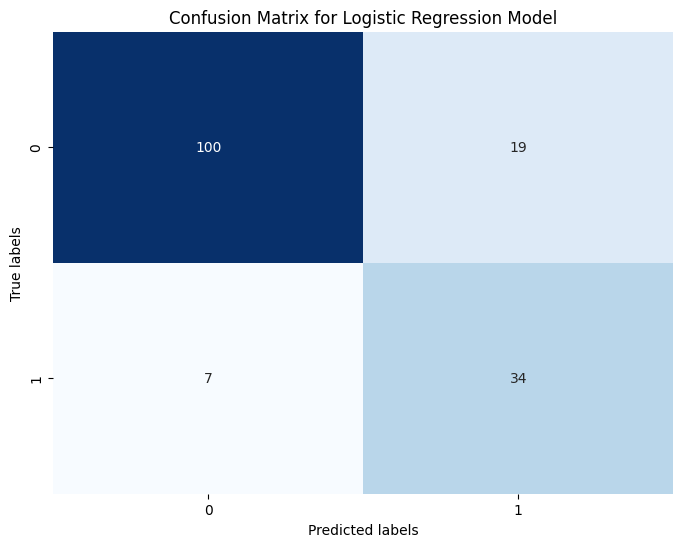

In [32]:
# Importing confusion_matrix function
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix for the validation data using the first model (Logistic Regression)
conf_matrix = confusion_matrix(Y_val, models[0].predict(X_val_normalized))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()